# 绘制手写字🖊️
| **实现思路**🤔       | **操作步骤**🔁                  |
|----------------------|---------------------------------|
| - 鼠标坐标定位           | 1. 运行后按笔画顺序**鼠标左键**点击汉字      |
| - 平滑处理线条           | 2. 写完这一个字（这一笔）后按 `Enter`（Windows）/`Return`（Mac） |
| - 手写文字绘制           | 3. 完成最后一个字后关闭图片      |
‼️：由于平滑至少要四个坐标，所以每一部分，至少要点**4**次。  
Reference：[*Functional Data Analysis with R and MATLAB*](https://link.springer.com/book/10.1007/978-0-387-98185-7)

## 1 鼠标坐标定位
这一步需要交互完成，我使用的是vscode，jupyter无法实现

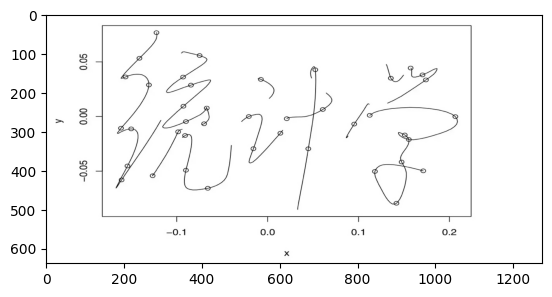

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 汉字坐标
all_points = []
points = []

def onclick(event):
    if event.button == 1:  # 左键点击定位
        points.append((event.xdata, event.ydata))
        print(f"坐标：({event.xdata:.4f}, {event.ydata:.4f})")

def on_key(event):
    global points
    if event.key == 'enter':  # 按下Enter键进入下一部分
        if points:
            all_points.append(points)
            points = []
            print("当前字的坐标提取完成，开始提取下一个字的坐标。")

fig, ax = plt.subplots()
img = plt.imread("统计学.jpg")
ax.imshow(img)

cid = fig.canvas.mpl_connect('button_press_event', onclick)
kid = fig.canvas.mpl_connect('key_press_event', on_key)
plt.show()

# 确保最后一个字的坐标也被添加
if points:
    all_points.append(points)

直接导入vscode交互后的定位的坐标：

In [2]:
all_points = [[(280.976814516129, 47.5625), (237.2772177419355, 109.25604838709683), (197.4334677419355, 164.52318548387098), (264.2681451612903, 179.94657258064524), (185.86592741935482, 295.6219758064517), (221.85383064516128, 295.6219758064517), (205.14516129032256, 390.73286290322585), (188.43649193548384, 431.86189516129036), (292.54435483870964, 280.19858870967744)], [(349.0967741935484, 92.54737903225805), (409.5050403225806, 113.11189516129036), (309.2530241935484, 196.6552419354839), (419.7872983870967, 165.8084677419355), (297.6854838709677, 286.625), (409.5050403225806, 239.06955645161293), (418.5020161290322, 263.4899193548388), (406.9344758064516, 284.054435483871)], [(347.8114919354838, 294.3366935483872), (338.8145161290322, 303.3336693548388), (310.5383064516129, 354.7449596774194), (274.5504032258064, 413.8679435483872)], [(355.523185483871, 316.1864919354839), (369.6612903225806, 309.76008064516134), (355.523185483871, 403.585685483871), (358.09375, 443.42943548387103), (455.7752016129032, 428.0060483870968), (472.48387096774184, 340.60685483870975)], [(549.6008064516128, 170.94959677419354), (572.7358870967741, 181.23185483870975), (585.5887096774193, 196.6552419354839), (575.3064516129032, 217.2197580645162)], [(507.1864919354838, 275.0574596774194), (550.8860887096773, 260.91935483870975), (521.3245967741935, 381.73588709677426), (604.8679435483871, 304.6189516129033)], [(617.7207661290322, 272.48689516129036), (687.1260080645161, 257.0635080645162), (734.6814516129032, 224.9314516129033), (720.5433467741935, 206.9375)], [(683.2701612903226, 163.23790322580646), (680.6995967741935, 150.38508064516134), (689.6965725806451, 140.10282258064524), (676.8437499999999, 348.3185483870968), (645.9969758064516, 498.69657258064524)], [(873.4919354838709, 125.96471774193549), (887.6300403225806, 165.8084677419355), (899.1975806451611, 176.0907258064517), (918.4768145161289, 159.38205645161293)], [(935.1854838709677, 138.81754032258073), (944.1824596774192, 160.66733870967744), (999.4495967741935, 137.5322580645162), (881.2036290322579, 222.36088709677426)], [(829.7923387096774, 232.64314516129036), (791.2338709677418, 281.48387096774195), (768.0987903225806, 314.9012096774194), (775.8104838709677, 316.1864919354839)], [(833.6481854838709, 258.3487903225807), (1053.431451612903, 260.91935483870975), (935.1854838709677, 323.898185483871), (908.1945564516128, 303.3336693548388), (922.3326612903226, 308.4747983870968), (912.0504032258065, 379.16532258064524), (894.0564516129031, 480.702620967742), (843.930443548387, 399.72983870967744), (966.032258064516, 403.585685483871)]]

## 2 平滑处理线条&绘制

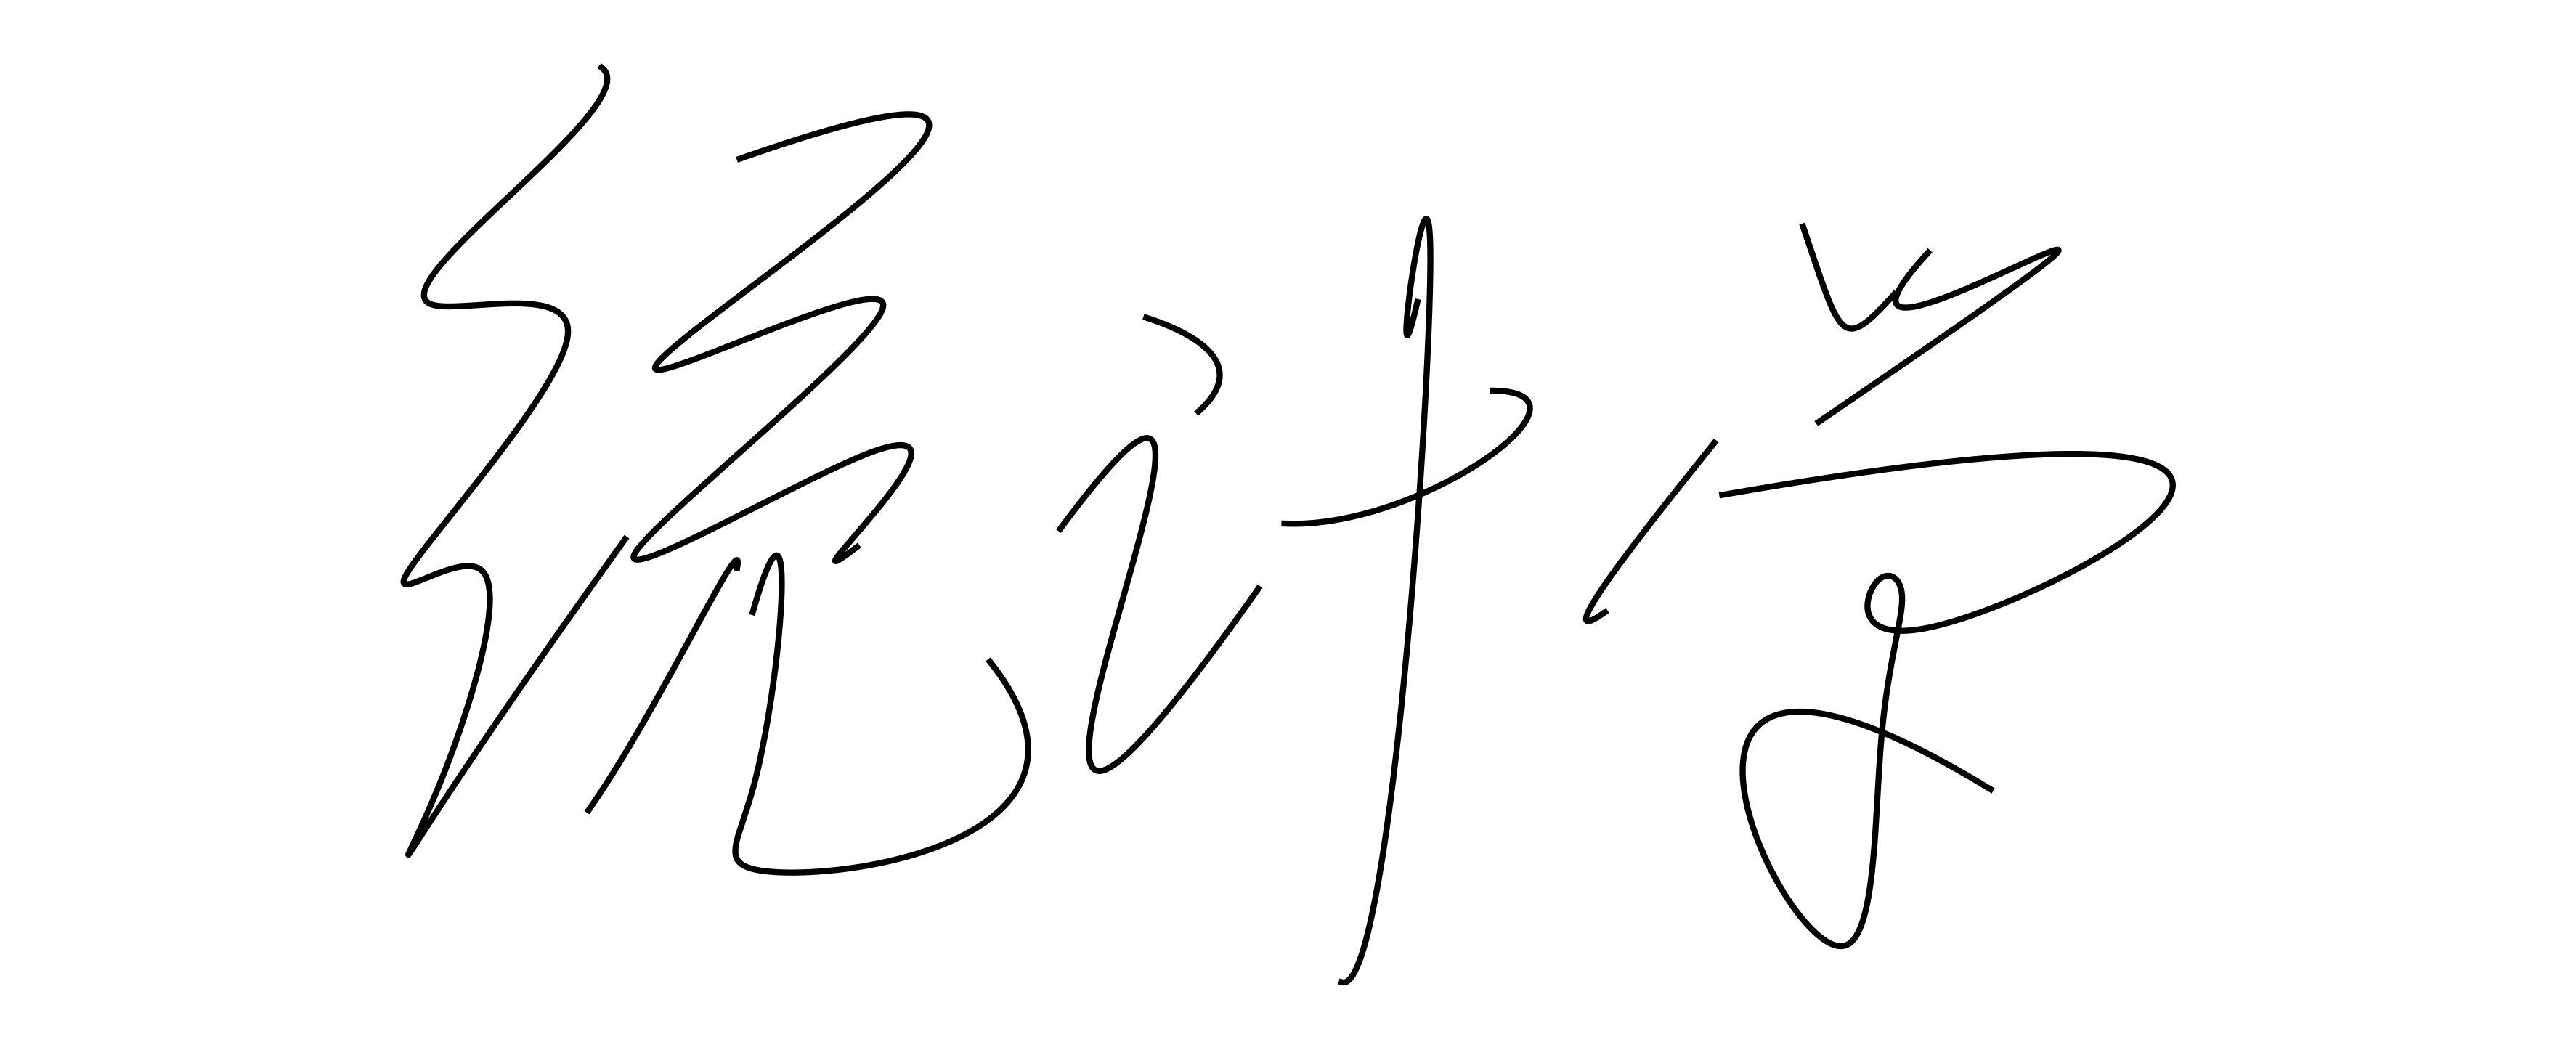

In [4]:
# 可视化
plt.figure(figsize=(15, 6), dpi=300)
for i, single_word_points in enumerate(all_points):
    x = np.array([p[0] for p in single_word_points])
    y = np.array([p[1] for p in single_word_points])

    # 定义平滑函数
    def smooth_stroke(x, y, smooth_factor=300):
        t = np.linspace(0, 1, len(x))
        spl_x = make_interp_spline(t, x, k=3)
        spl_y = make_interp_spline(t, y, k=3)
        t_new = np.linspace(0, 1, smooth_factor)
        return spl_x(t_new), spl_y(t_new)

    x_smooth, y_smooth = smooth_stroke(x, y)

    # 绘制每个字
    plt.plot(x_smooth, -y_smooth, 'k-', lw=2)

plt.axis('equal')
plt.axis('off')
plt.show()

## 3 再来一些其他的🌲
### 中文案例

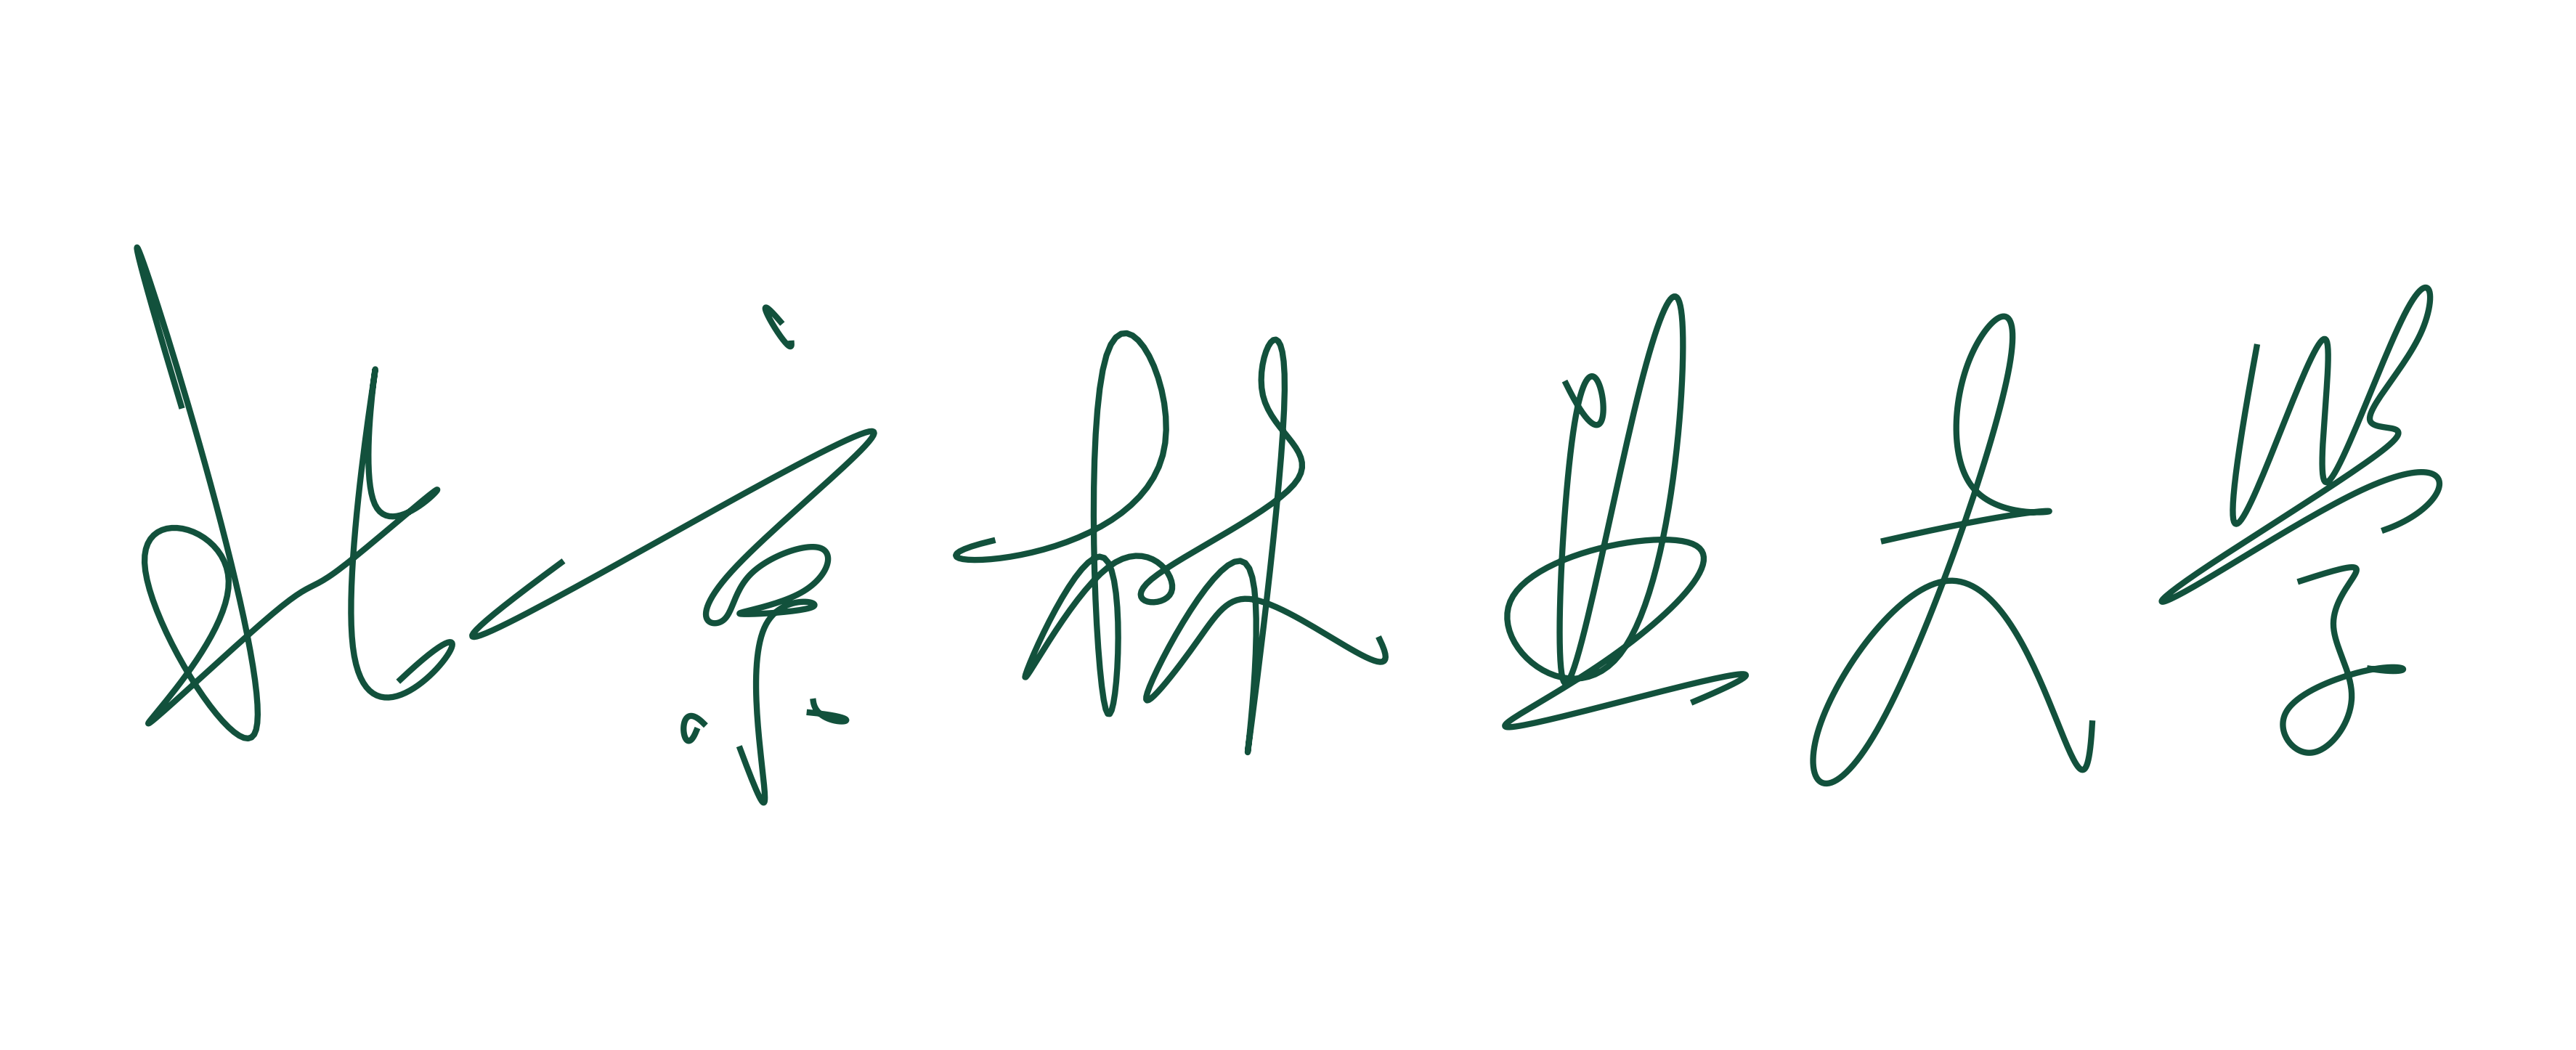

In [9]:
all_points = [[(724.2237903225807, 501.941935483871), (722.0796370967741, 480.5004032258066), (767.1068548387098, 694.9157258064517), (702.7822580645161, 594.1405241935485), (752.0977822580646, 604.8612903225808), (704.9264112903227, 688.4832661290324), (777.827620967742, 624.1586693548388), (816.422379032258, 598.4288306451614), (874.3145161290322, 551.2574596774195), (837.8639112903227, 559.8340725806454), (837.8639112903227, 482.64455645161297), (824.9989919354839, 643.4560483870969), (872.1703629032259, 658.465120967742), (852.8729838709678, 662.7534274193549)], [(1075.8649193548388, 452.6264112903227), (1067.288306451613, 446.19395161290345), (1075.8649193548388, 461.2030241935486), (1082.297379032258, 465.4913306451615)], [(947.2157258064517, 594.1405241935485), (962.2247983870968, 604.8612903225808), (1129.46875, 516.9510080645164), (1047.9909274193549, 598.4288306451614), (1041.5584677419354, 628.4469758064517), (1058.711693548387, 600.5729838709678), (1099.4506048387098, 585.5639112903227), (1088.7298387096773, 611.2937500000002), (1052.2792338709678, 624.1586693548388), (1095.1622983870968, 619.8703629032259), (1067.288306451613, 630.5911290322582), (1065.1441532258063, 714.2131048387098), (1052.2792338709678, 703.4923387096775)], [(1030.8377016129032, 688.4832661290324), (1020.116935483871, 686.3391129032259), (1020.116935483871, 697.0598790322582), (1026.5493951612902, 692.7715725806453)], [(1093.0181451612902, 682.050806451613), (1114.4596774193549, 686.3391129032259), (1105.883064516129, 686.3391129032259), (1095.1622983870968, 675.6183467741937)], [(1200.225806451613, 581.2756048387098), (1215.234879032258, 589.8522177419356), (1301.001008064516, 527.6717741935486), (1266.694556451613, 474.06794354838735), (1266.694556451613, 679.9066532258065), (1266.694556451613, 591.996370967742), (1219.523185483871, 660.6092741935485), (1268.8387096774193, 596.2846774193549), (1305.289314516129, 611.2937500000002), (1292.4243951612902, 604.8612903225808), (1378.1905241935483, 546.9691532258066), (1358.8931451612902, 495.50947580645175), (1371.758064516129, 491.2211693548388), (1350.3165322580644, 703.4923387096775), (1350.3165322580644, 596.2846774193549), (1292.4243951612902, 667.0417338709678), (1318.1542338709678, 643.4560483870969), (1352.460685483871, 615.582056451613), (1408.2086693548388, 643.4560483870969), (1427.5060483870968, 639.167741935484)], [(1536.8578629032259, 489.0770161290325), (1558.2993951612902, 497.6536290322583), (1541.1461693548388, 516.9510080645164), (1536.8578629032259, 664.8975806451614), (1579.7409274193549, 493.3653225806454), (1605.4707661290322, 465.4913306451615), (1566.876008064516, 649.8885080645163), (1504.695564516129, 615.582056451613), (1611.9032258064515, 583.4197580645161), (1562.5877016129032, 649.8885080645163), (1502.5514112903224, 690.6274193548388), (1603.3266129032259, 667.0417338709678), (1611.9032258064515, 675.6183467741937)], [(1723.3991935483868, 581.2756048387098), (1819.8860887096776, 564.1223790322581), (1774.858870967742, 549.113306451613), (1774.858870967742, 471.92379032258077), (1796.3004032258063, 482.64455645161297), (1719.1108870967741, 692.7715725806453), (1684.804435483871, 692.7715725806453), (1759.8497983870966, 604.8612903225808), (1822.030241935484, 679.9066532258065), (1845.6159274193546, 688.4832661290324)], [(1942.102822580645, 467.63548387096785), (1942.102822580645, 551.2574596774195), (1982.8417338709678, 463.3471774193549), (1982.8417338709678, 546.9691532258066), (2030.0131048387098, 446.19395161290345), (2038.5897177419356, 459.058870967742), (2008.571572580645, 510.51854838709687), (2019.2923387096776, 525.527620967742), (1909.9405241935483, 598.4288306451614), (1903.5080645161288, 609.1495967741937), (2004.2832661290322, 551.2574596774195), (2049.310483870968, 546.9691532258066), (2017.1481854838707, 574.8431451612905)], [(1967.8326612903224, 604.8612903225808), (1999.9949596774195, 600.5729838709678), (1987.1300403225805, 630.5911290322582), (1997.8508064516127, 673.4741935483872), (1974.265120967742, 705.636491935484), (1959.2560483870966, 682.050806451613), (2002.1391129032259, 658.465120967742), (2027.868951612903, 656.3209677419356), (2008.571572580645, 656.3209677419356)]]

# 可视化
plt.figure(figsize=(15, 6), dpi=300)
for i, single_word_points in enumerate(all_points):
    x = np.array([p[0] for p in single_word_points])
    y = np.array([p[1] for p in single_word_points])

    # 定义平滑函数
    def smooth_stroke(x, y, smooth_factor=300):
        t = np.linspace(0, 1, len(x))
        spl_x = make_interp_spline(t, x, k=3)
        spl_y = make_interp_spline(t, y, k=3)
        t_new = np.linspace(0, 1, smooth_factor)
        return spl_x(t_new), spl_y(t_new)

    x_smooth, y_smooth = smooth_stroke(x, y)

    # 绘制每个字
    plt.plot(x_smooth, -y_smooth, color=[18/255, 81/255, 60/255], lw=2)

plt.axis('equal')
plt.axis('off')
plt.show()

### 英文案例

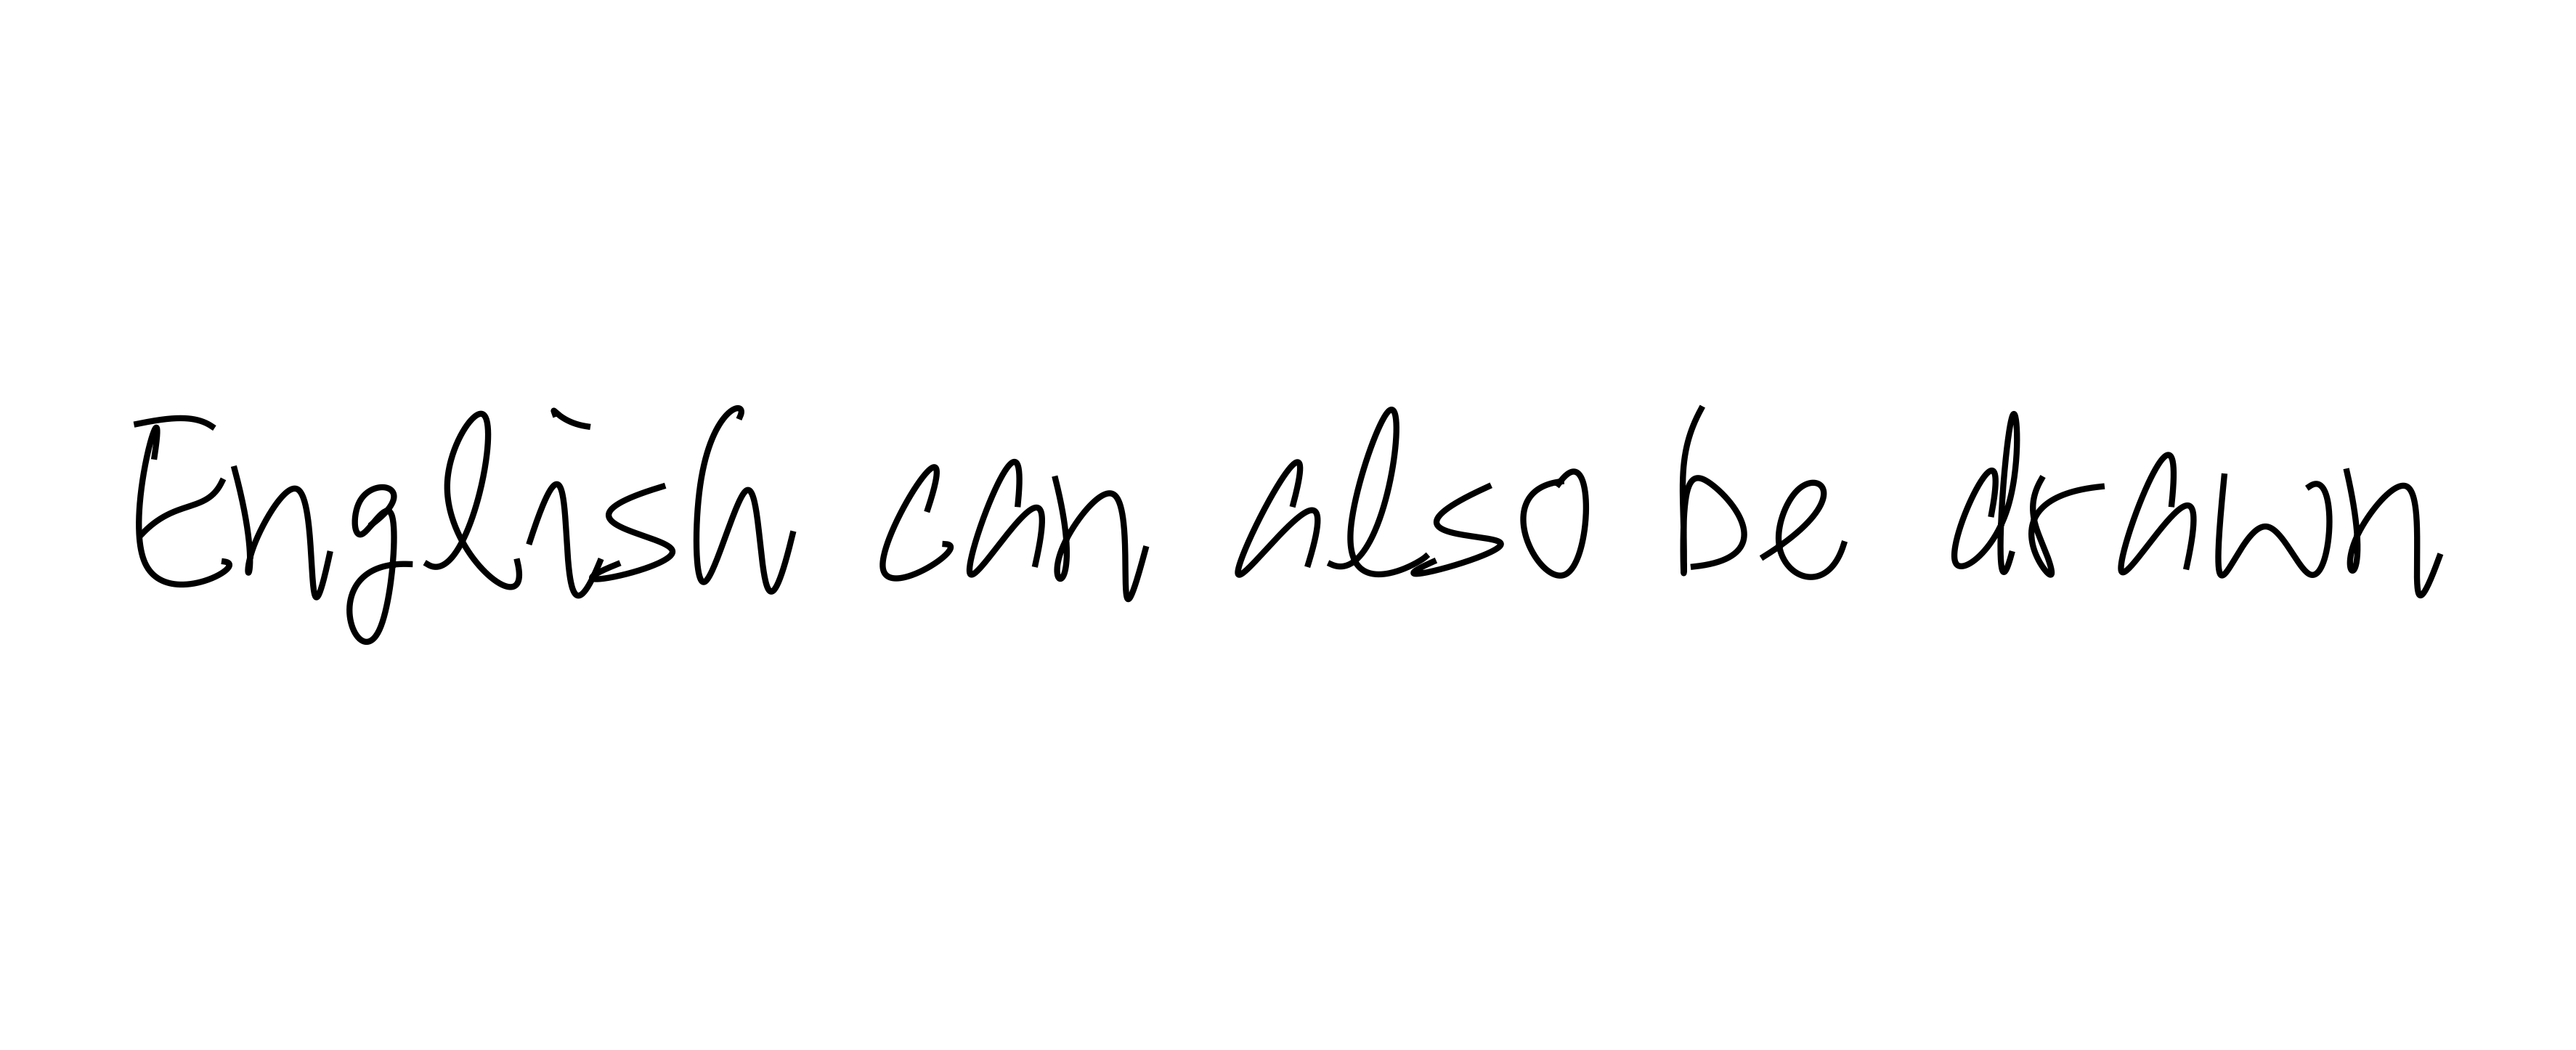

In [7]:
 all_points = [[(62.9072580645161, 123.54637096774195), (85.28629032258061, 119.81653225806451), (103.93548387096774, 119.81653225806451), (118.85483870967738, 125.41129032258061)], [(75.96169354838707, 147.79032258064512), (70.36693548387098, 147.79032258064512), (68.50201612903226, 226.11693548387098), (111.39516129032256, 241.0362903225806), (128.17943548387092, 226.11693548387098)], [(66.63709677419354, 205.60282258064512), (90.88104838709677, 188.81854838709683), (111.39516129032256, 181.35887096774195), (126.31451612903226, 166.4395161290323)], [(135.6391129032258, 157.11491935483866), (146.82862903225805, 231.71169354838707), (150.55846774193543, 213.0625), (182.26209677419354, 172.0342741935484), (193.4516129032258, 233.57661290322585), (206.50604838709677, 220.52217741935488)], [(238.20967741935476, 198.14314516129036), (251.26411290322574, 172.0342741935484), (228.88508064516122, 181.35887096774195), (230.75, 205.60282258064512), (253.1290322580645, 192.54838709677415), (243.80443548387098, 276.4697580645161), (221.42540322580646, 265.2802419354839), (266.1834677419355, 227.98185483870964)], [(279.23790322580646, 227.98185483870964), (316.5362903225806, 181.35887096774195), (320.26612903225805, 116.08669354838707), (294.1572580645161, 168.30443548387098), (323.9959677419355, 235.4415322580645), (346.375, 226.11693548387098)], [(374.3487903225806, 116.08669354838707), (374.3487903225806, 114.22177419354841), (381.8084677419355, 119.81653225806451), (398.5927419354838, 125.41129032258061)], [(355.69959677419354, 211.19758064516134), (379.9435483870967, 175.76411290322585), (385.5383064516128, 237.3064516129033), (407.9173387096773, 226.11693548387098)], [(454.5403225806451, 170.16935483870964), (422.8366935483871, 200.00806451612902), (462.0, 218.6572580645161), (419.10685483870964, 237.3064516129033), (420.9717741935483, 227.98185483870964)], [(512.3528225806451, 117.95161290322585), (503.0282258064516, 116.08669354838707), (482.51411290322574, 170.16935483870964), (486.2439516129032, 241.0362903225806), (516.0826612903226, 173.89919354838707), (529.1370967741935, 227.98185483870964), (551.516129032258, 205.60282258064512)], [(652.2217741935483, 186.95362903225805), (644.7620967741934, 168.30443548387098), (618.6532258064516, 229.8467741935484), (650.3568548387096, 231.71169354838707), (665.2762096774193, 213.0625)], [(719.3588709677418, 183.2237903225806), (702.5745967741934, 172.0342741935484), (683.9254032258063, 235.4415322580645), (719.3588709677418, 196.2782258064516), (732.4133064516128, 227.98185483870964)], [(747.3326612903226, 164.57459677419354), (752.9274193548387, 237.3064516129033), (752.9274193548387, 214.92741935483866), (790.2258064516128, 175.76411290322585), (799.5504032258065, 237.3064516129033), (814.469758064516, 216.79233870967744)], [(924.4999999999999, 183.2237903225806), (911.4455645161289, 172.0342741935484), (883.4717741935482, 235.4415322580645), (922.6350806451611, 198.14314516129036), (935.6895161290321, 227.98185483870964)], [(952.4737903225806, 227.98185483870964), (995.3669354838709, 172.0342741935484), (995.3669354838709, 114.22177419354841), (967.3931451612901, 201.8729838709678), (991.6370967741935, 235.4415322580645), (1023.3407258064516, 222.38709677419354)], [(1069.963709677419, 170.16935483870964), (1040.125, 203.73790322580646), (1079.2883064516127, 213.0625), (1034.530241935484, 231.71169354838707), (1028.9354838709678, 226.11693548387098)], [(1124.046370967742, 166.4395161290323), (1097.9375, 207.4677419354839), (1127.776209677419, 235.4415322580645), (1142.6955645161288, 183.2237903225806), (1122.181451612903, 168.30443548387098)], [(1228.4818548387098, 112.35685483870964), (1215.4274193548385, 155.25), (1215.4274193548385, 201.8729838709678), (1215.4274193548385, 233.57661290322585), (1217.292338709677, 177.6290322580645), (1235.9415322580644, 168.30443548387098), (1260.1854838709678, 201.8729838709678), (1222.8870967741937, 229.8467741935484)], [(1275.104838709677, 222.38709677419354), (1319.8629032258063, 175.76411290322585), (1301.213709677419, 172.0342741935484), (1286.2943548387098, 211.19758064516134), (1306.8084677419351, 237.3064516129033), (1334.782258064516, 213.0625)], [(1444.8125, 190.6834677419355), (1433.6229838709678, 172.0342741935484), (1418.703629032258, 227.98185483870964), (1456.0020161290322, 188.81854838709683), (1461.5967741935483, 116.08669354838707), (1452.2721774193546, 190.6834677419355), (1459.7318548387098, 220.52217741935488)], [(1482.1108870967741, 164.57459677419354), (1476.516129032258, 194.41330645161293), (1485.8407258064512, 220.52217741935488), (1487.7056451612902, 235.4415322580645), (1474.651209677419, 203.73790322580646), (1526.868951612903, 170.16935483870964)], [(1579.0866935483868, 183.2237903225806), (1562.3024193548385, 166.4395161290323), (1541.7883064516127, 233.57661290322585), (1577.2217741935483, 194.41330645161293), (1590.276209677419, 229.8467741935484)], [(1618.25, 162.70967741935488), (1620.1149193548385, 233.57661290322585), (1649.953629032258, 200.00806451612902), (1681.657258064516, 235.4415322580645), (1696.5766129032259, 200.00806451612902), (1681.657258064516, 170.16935483870964)], [(1709.6310483870966, 158.97983870967744), (1715.2258064516127, 231.71169354838707), (1717.0907258064512, 207.4677419354839), (1754.3891129032254, 170.16935483870964), (1761.8487903225805, 231.71169354838707), (1778.6330645161288, 222.38709677419354)]]

# 可视化
plt.figure(figsize=(15, 6), dpi=300)
for i, single_word_points in enumerate(all_points):
    x = np.array([p[0] for p in single_word_points])
    y = np.array([p[1] for p in single_word_points])

    # 定义平滑函数
    def smooth_stroke(x, y, smooth_factor=300):
        t = np.linspace(0, 1, len(x))
        spl_x = make_interp_spline(t, x, k=3)
        spl_y = make_interp_spline(t, y, k=3)
        t_new = np.linspace(0, 1, smooth_factor)
        return spl_x(t_new), spl_y(t_new)

    x_smooth, y_smooth = smooth_stroke(x, y)

    # 绘制每个字
    plt.plot(x_smooth, -y_smooth, 'k-', lw=2)

plt.axis('equal')
plt.axis('off')
plt.show()

### 图像案例

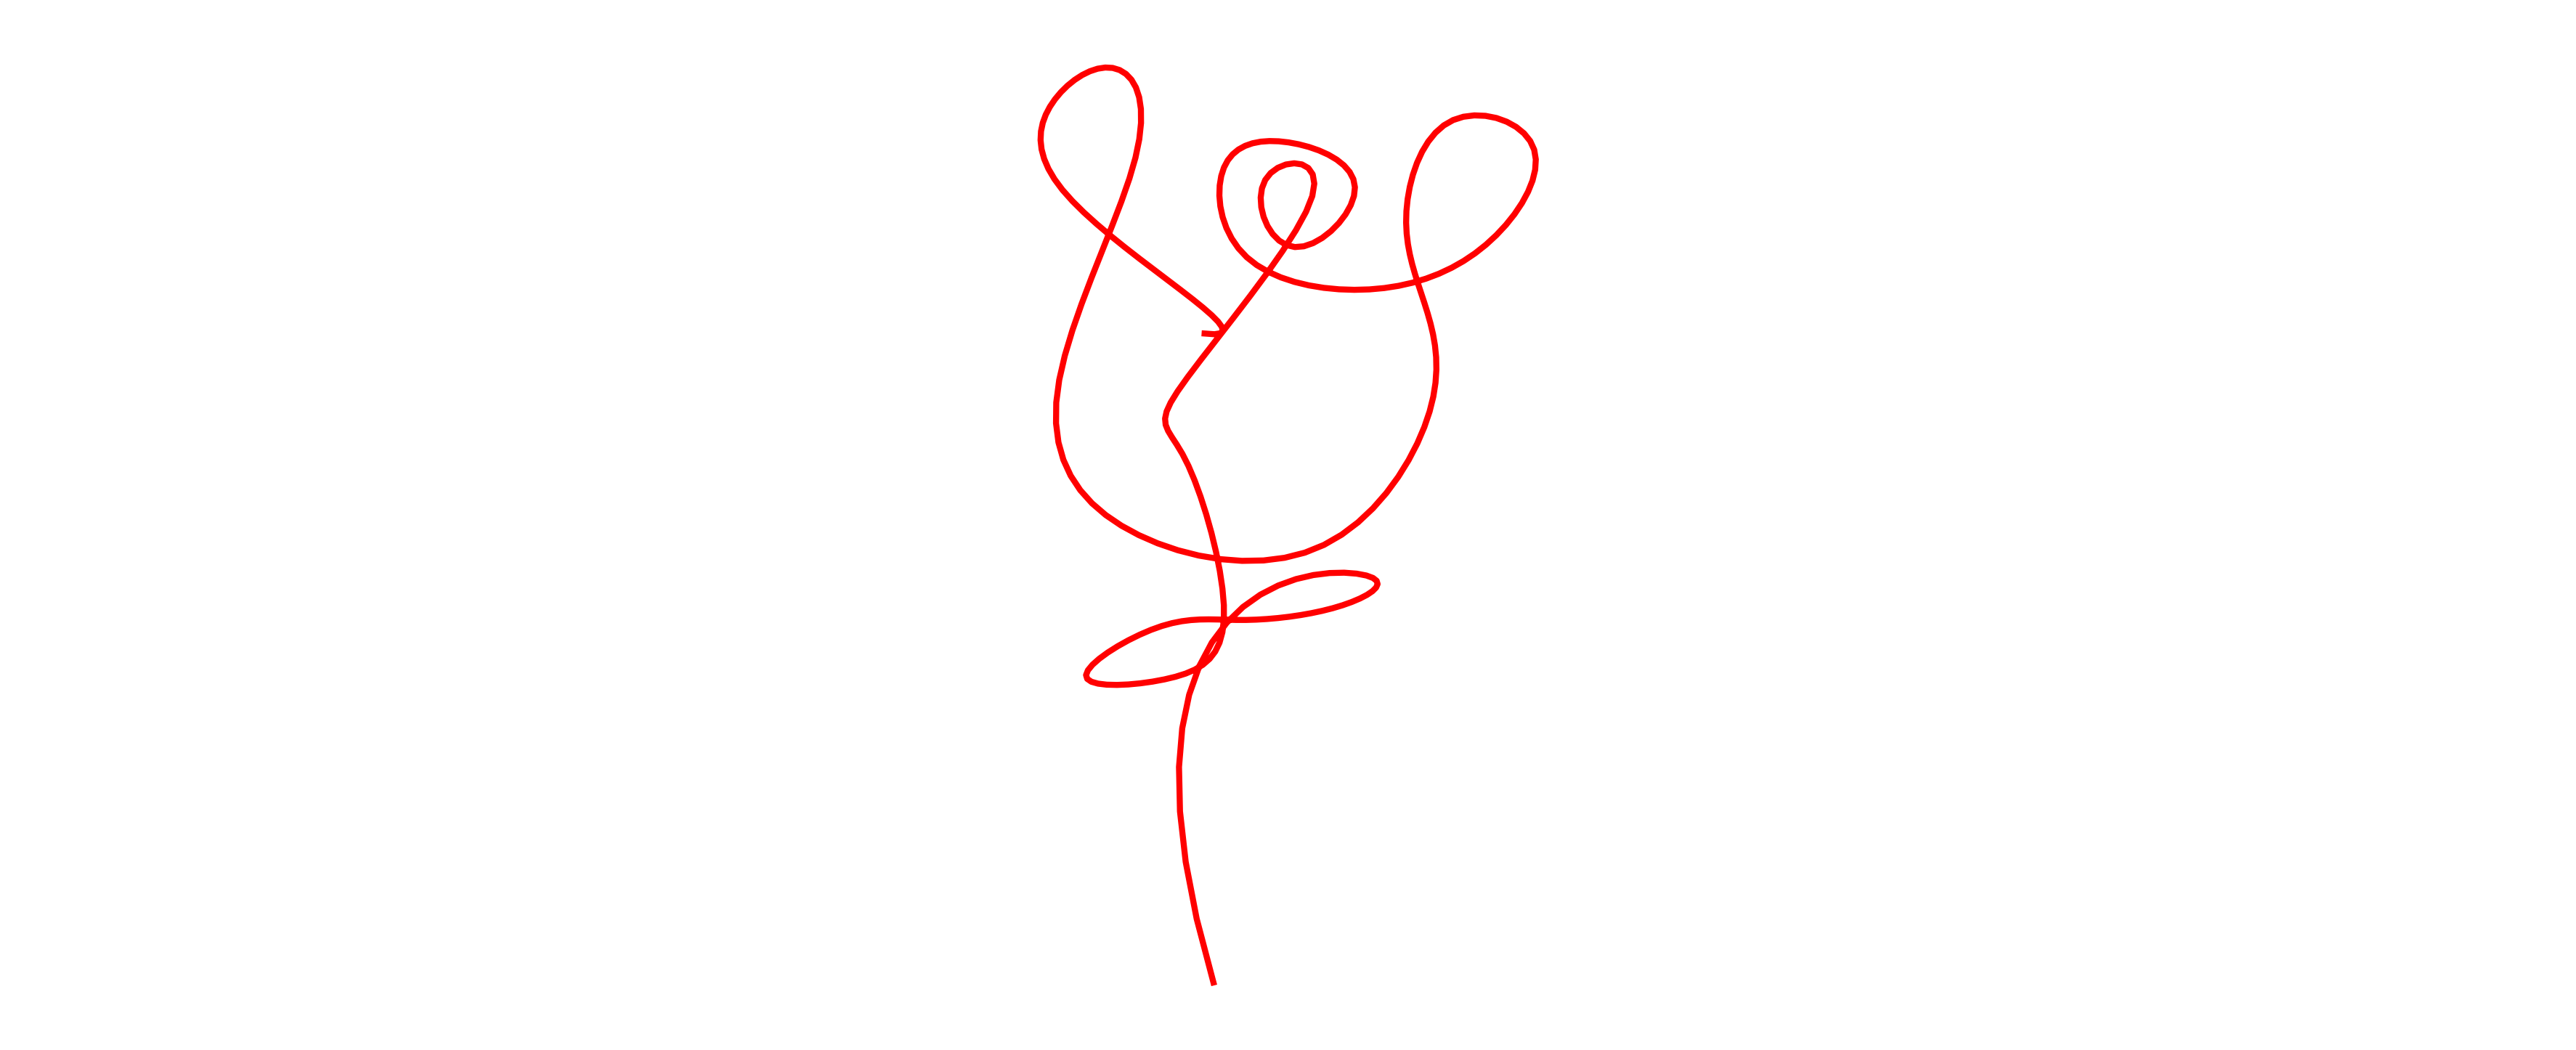

In [10]:
 all_points = [[(305.8203463203463, 456.29653679653666), (281.57792207792204, 413.00649350649337), (165.560606060606, 314.3051948051948), (155.17099567099558, 232.9199134199132), (217.5086580086579, 196.55627705627694), (236.55627705627694, 290.06277056277054), (162.0974025974025, 509.97619047619037), (231.36147186147184, 648.504329004329), (413.1796536796535, 667.551948051948), (524.0021645021643, 539.4134199134198), (522.2705627705627, 430.3225108225108), (503.2229437229437, 340.2792207792206), (546.512987012987, 248.50432900432884), (627.8982683982683, 274.4783549783549), (582.8766233766232, 367.9848484848485), (468.590909090909, 413.00649350649337), (347.37878787878776, 381.8376623376623), (324.8679653679653, 293.52597402597394), (388.93722943722923, 269.2835497835497), (453.00649350649337, 314.3051948051948), (392.40043290043286, 371.4480519480519), (366.4264069264068, 303.91558441558436), (409.7164502164501, 326.4264069264068), (285.04112554112544, 504.78138528138516), (286.77272727272725, 579.2402597402597), (324.8679653679653, 729.8896103896103), (271.1883116883116, 793.9588744588744), (189.80303030303025, 792.2272727272726), (260.7987012987012, 743.7424242424241), (343.91558441558436, 736.8160173160172), (439.15367965367955, 722.9632034632034), (465.1277056277056, 693.5259740259739), (328.3311688311687, 738.547619047619), (314.4783549783549, 1091.7943722943724)]]

# 可视化
plt.figure(figsize=(15, 6), dpi=300)
for i, single_word_points in enumerate(all_points):
    x = np.array([p[0] for p in single_word_points])
    y = np.array([p[1] for p in single_word_points])

    # 定义平滑函数
    def smooth_stroke(x, y, smooth_factor=300):
        t = np.linspace(0, 1, len(x))
        spl_x = make_interp_spline(t, x, k=3)
        spl_y = make_interp_spline(t, y, k=3)
        t_new = np.linspace(0, 1, smooth_factor)
        return spl_x(t_new), spl_y(t_new)

    x_smooth, y_smooth = smooth_stroke(x, y)

    # 绘制每个字
    plt.plot(x_smooth, -y_smooth, 'r-', lw=2)

plt.axis('equal')
plt.axis('off')
plt.show()